<a href="https://colab.research.google.com/github/honeylouluzon/K-Means-Clustering-in-Python/blob/main/Banknote_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

           V1        V2   Distance  Cluster
0     3.62160   8.66610   9.392405        1
1     4.54590   8.16740   9.347279        1
2     3.86600  -2.63830   4.680447        2
3     3.45660   9.52280  10.130736        3
4     0.32924  -4.45520   4.467349        2
...       ...       ...        ...      ...
1367  0.40614   1.34920   1.409003        0
1368 -1.38870  -4.87730   5.071148        2
1369 -3.75030 -13.45860  13.971352        3
1370 -3.56370  -8.38270   9.108766        1
1371 -2.54190  -0.65804   2.625695        0

[1372 rows x 4 columns]

Cluster 0: Center = [2.16766336], Count = 380
Cluster 1: Center = [8.13249391], Count = 374
Cluster 2: Center = [4.95020387], Count = 418
Cluster 3: Center = [11.38526849], Count = 200

ROW/COUNT: 1372
VARIANCE: Mean: 0.43 | Median: 0.5 | STD: 2.84
SKEWNESS: Mean: 1.92 | Median: 2.32 | STD: 5.87


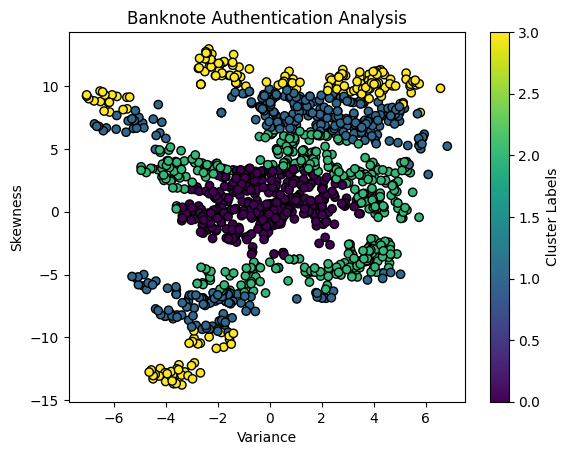

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import numpy as np

#Load the DataSet
data = pd. read_csv ('/content/drive/MyDrive/LIFELONG LEARNING/Data Science/Banknote_authentication_dataset.csv')

#Set and label the coordinates
variance = data[ 'V1']
skewness = data['V2']
plt.xlabel ('Variance')
plt.ylabel ('Skewness')
plt.title ('Banknote Authentication Analysis')

#for k, row in data.iterrows() :
#plt.text(row['GDP'], row['happyScore'], row['country'])

"""
#plot the dataset
plt.scatter (variance, skewness, s=3)
"""

#med_V1 = np.median(variance)
#med_V2 = np.median(skewness)

"""
#Mark a line to the desired value
plt.plot([0]*len(skewness),skewness, linestyle="-", color="b", linewidth=100, alpha=0.25)
plt.plot(variance, [0]*len(variance), linestyle="-", color="yellow", linewidth=10, alpha=0.25)
banknote = np.column_stack((variance, skewness))
"""

# Convert data to a DataFrame
df = pd.DataFrame(data, columns=['V1', 'V2'])

# Compute Euclidean distance from [0,0]
df['Distance'] = np.sqrt(df['V1']**2 + df['V2']**2)

# Apply K-Means clustering on distances (reshaped for model)
kmeans = KMeans(n_clusters=4, n_init=1)
df['Cluster'] = kmeans.fit_predict(df[['Distance']])

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Count points in each cluster
cluster_counts = np.bincount(kmeans.labels_)


# Display results
print(df, end="\n\n")
for i, (center, count) in enumerate(zip(cluster_centers, cluster_counts)):
    print(f"Cluster {i}: Center = {center}, Count = {count}")

print("\nROW/COUNT:", data.shape[0])
print("VARIANCE: Mean:", np.round(np.mean(variance),2),"| Median:",np.round(np.median(variance),2),"| STD:", np.round(np.std(variance),2))
print("SKEWNESS: Mean:", np.round(np.mean(skewness),2),"| Median:",np.round(np.median(skewness),2),"| STD:", np.round(np.std(skewness),2))


#plot the datapoints
plt.scatter(variance,skewness, c=df['Cluster'], cmap='viridis', edgecolor='k')
plt.savefig('BankNoteAnalysis.png')
"""
# Apply DBSCAN clustering based on distance
dbscan = DBSCAN(eps=0.6, min_samples=1)  # Adjust eps to control "closeness"
cluster_labels = dbscan.fit_predict(banknote) #(df[['X', 'Y']])

#banknote['Cluster']= cluster_labels
print(cluster_labels)

plt.scatter(variance,skewness,c=cluster_labels, cmap='viridis', edgecolor='k')
"""
plt.colorbar(label="Cluster Labels")





plt.show()